In [47]:
# A simulation showing sequence divergence from original.
from Levenshtein import distance
%config InlineBackend.figure_format = 'retina'

In [48]:
from random import choice
def make_random_nt(length):
    rnt = ''  # rnt = "random nucleotide"
    for i in range(length):
        rnt += choice('ATGC')
    return rnt


def mutate(sequence):
    """
    Introduces 1 mutation at random.
    """
    
    pos = choice(range(len(sequence)))  # choose a random position to mutate
    newletter = choice(list(set('ATGC').difference(sequence[pos])))
    
    newseq = ''
    for i, letter in enumerate(sequence):
        if i == pos:
            newseq += newletter
        else:
            newseq += letter
    return newseq

In [49]:
seq = make_random_nt(100)
seq
mut = mutate(seq)
mut

'AGCCCCGTTTACCCGAGGCATGCCCAGGGTTGGCCGCTTTCGCAGATGGGGCGCAGCAACAATTACATTAAAGACTTAACTGCAATGGCCGGAGTACGTT'

In [50]:
distance(seq, mut)

1

In [51]:
from collections import defaultdict

# Plot continual distance trajectory for 100 steps.
original = make_random_nt(100)

n_trajectories = 100
n_steps = 200

distance_trajectories = defaultdict(list)
# distances = []

for t in range(n_trajectories):
    new_sequence = original
    for i in range(n_steps):
        new_sequence = mutate(new_sequence)
        distance_trajectories[t].append(distance(original, new_sequence))


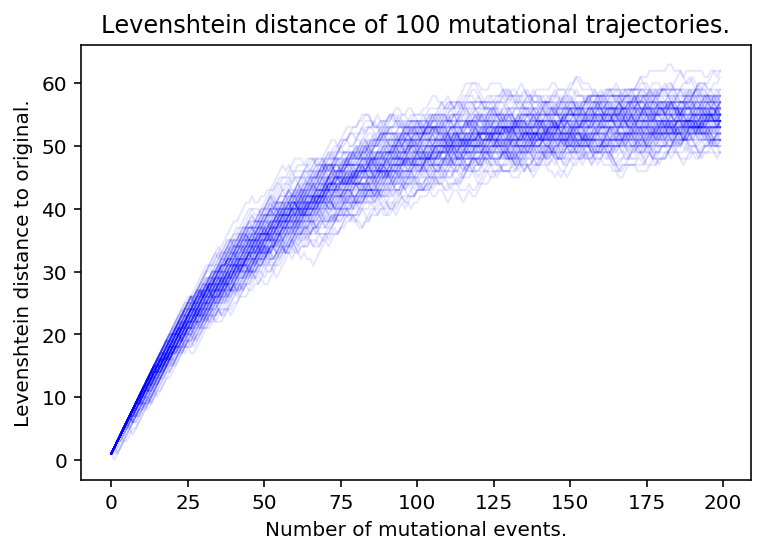

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize=(10,6))
for t, dists in distance_trajectories.items():
    plt.plot(dists, alpha=0.1, color='blue', lw=1)
plt.ylabel('Levenshtein distance to original.')
plt.xlabel('Number of mutational events.')
plt.title('Levenshtein distance of 100 mutational trajectories.')
# plt.savefig('hamming.png', dpi=300) 